# Import libs

In [49]:
import pandas as pd
import numpy as np
from knn.knn import knn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# Loading Iris dataset

In [50]:
Xy = pd.read_csv('./datasets/iris.csv')
X = Xy.drop(['class'], axis=1)
y = Xy['class']

# Instantiating model

In [51]:
knn_model = knn(k=3, type_distance_calc='euclidean')

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Running the tests and computing informations

In [52]:
realizations = 20
hit_rate_list = []
std_dev = 0
confusion_matrix_list = []

for r in range(realizations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

    knn_model.fit(X_train, y_train)

    hit_rate_list.append(knn_model.score(X_test, y_test))

    y_pred = [knn_model.predict(x) for x in X_test.values]

    confusion_matrix_list.append(confusion_matrix(y_test, y_pred))

std_dev = np.std(hit_rate_list)

# Showing informations computed

In [53]:
print('Hit rate:')
print(hit_rate_list, end='\n\n')

print('Accuracy:')
print(sum(hit_rate_list)/len(hit_rate_list), end='\n\n')

print('Standard Deviation:')
print(std_dev, end='\n\n')

print('Confusion Matrix:')
for matrix in confusion_matrix_list:
    print(matrix, end='\n')

Hit rate:
[0.9, 1.0, 1.0, 0.9333333333333333, 0.9666666666666667, 1.0, 1.0, 0.9666666666666667, 0.9666666666666667, 0.8666666666666667, 0.9666666666666667, 0.9333333333333333, 1.0, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 1.0, 0.9333333333333333, 1.0, 0.9666666666666667]

Accuracy:
0.9616666666666667

Standard Deviation:
0.03693086634360056

Confusion Matrix:
[[ 7  0  0]
 [ 0  8  1]
 [ 0  2 12]]
[[ 8  0  0]
 [ 0 11  0]
 [ 0  0 11]]
[[13  0  0]
 [ 0  6  0]
 [ 0  0 11]]
[[10  0  0]
 [ 0  7  0]
 [ 0  2 11]]
[[11  0  0]
 [ 0 10  0]
 [ 0  1  8]]
[[12  0  0]
 [ 0 11  0]
 [ 0  0  7]]
[[14  0  0]
 [ 0  6  0]
 [ 0  0 10]]
[[ 8  0  0]
 [ 0  8  0]
 [ 0  1 13]]
[[11  0  0]
 [ 0  8  1]
 [ 0  0 10]]
[[9 0 0]
 [0 8 2]
 [0 2 9]]
[[10  0  0]
 [ 0  8  0]
 [ 0  1 11]]
[[12  0  0]
 [ 0  6  0]
 [ 0  2 10]]
[[11  0  0]
 [ 0  5  0]
 [ 0  0 14]]
[[11  0  0]
 [ 0  4  0]
 [ 0  2 13]]
[[11  0  0]
 [ 0 11  0]
 [ 0  2  6]]
[[10  0  0]
 [ 0 10  1]
 [ 0  0  9]]
[[ 7  0  0]
 [ 0 13  0]
 [ 0  0 10]]

# Choosing two columns from the last X_train and X_test to plot decision surface

In [54]:
X_train_2d, X_test_2d = X_train[['sepal-length', 'sepal-width']], X_test[['sepal-length', 'sepal-width']]

print('Train dataset:')
print(X_train_2d)
print('Test dataset:')
print(X_test_2d)

Train dataset:
     sepal-length  sepal-width
86            6.7          3.1
65            6.7          3.1
5             5.4          3.9
63            6.1          2.9
54            6.5          2.8
..            ...          ...
7             5.0          3.4
107           7.3          2.9
135           7.7          3.0
106           4.9          2.5
6             4.6          3.4

[120 rows x 2 columns]
Test dataset:
     sepal-length  sepal-width
131           7.9          3.8
80            5.5          2.4
130           7.4          2.8
126           6.2          2.8
2             4.7          3.2
61            5.9          3.0
34            4.9          3.1
33            5.5          4.2
62            6.0          2.2
94            5.6          2.7
71            6.1          2.8
73            6.1          2.8
55            5.7          2.8
56            6.3          3.3
119           6.0          2.2
134           6.1          2.6
88            5.6          3.0
121           5.6

# Training the model with the new dataset 2d

In [55]:
knn_model = knn(k=3, type_distance_calc='euclidean')
knn_model.fit(X_train_2d, y_train)

w:\Home\ML\knn\knn.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  self.__y = pd.Series([])


# Plotting decision surface

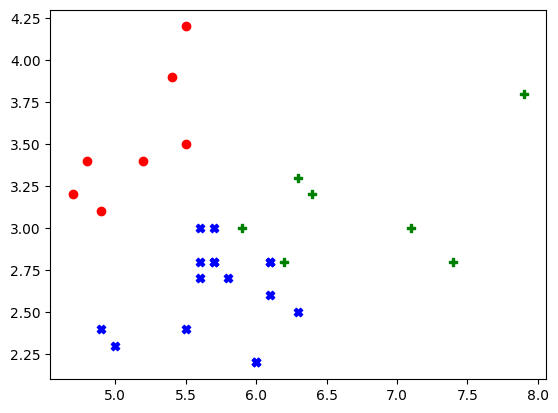

In [84]:
data = X_test_2d[:][:].values

y_pred = np.array([knn_model.predict(x) for x in X_test_2d.values])

setosa = np.where(y_pred == 'Iris-setosa')
virginica = np.where(y_pred == 'Iris-virginica')
versicolor = np.where(y_pred == 'Iris-versicolor')

plt.scatter(data[setosa, 0], data[setosa, 1],
            color='red', marker='o', label='setosa')
plt.scatter(data[versicolor, 0], data[versicolor, 1],
            color='blue', marker='X', label='versicolor')
plt.scatter(data[virginica, 0], data[virginica, 1],
            color='green', marker='P', label='virginica')

plt.show()